<a href="https://colab.research.google.com/github/himanshu123arya/Movie-recommendations-System/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split



In [3]:
ratings= pd.read_csv("/content/Dataset.csv")
movies= pd.read_csv("/content/Movie_Id_Titles.csv")

In [4]:
ratings.head()


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
ratings.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [7]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='rating', ylabel='count'>

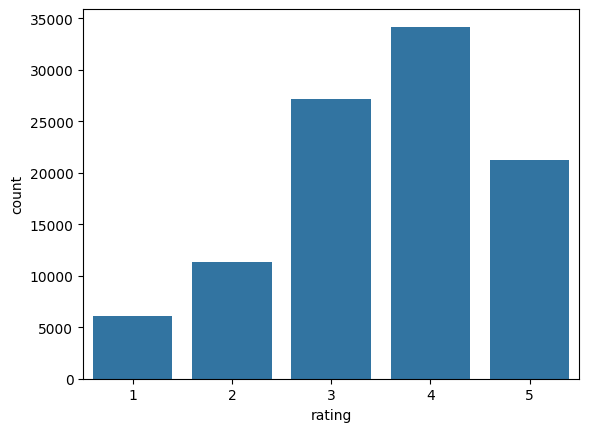

In [8]:
sns.countplot(x='rating',data=ratings)

Text(0.5, 1.0, 'rating distributon')

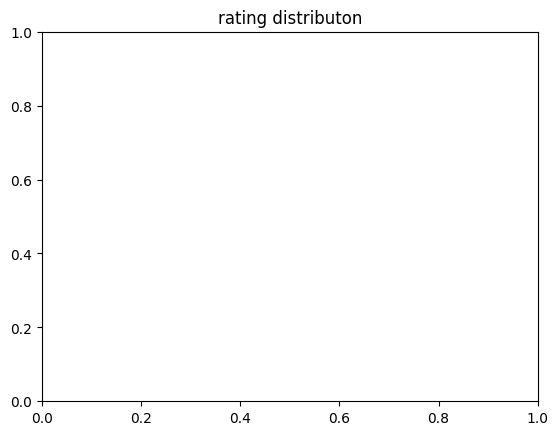

In [9]:
plt.title("rating distributon")

In [10]:
plt.show()

In [14]:
user_rating_count= ratings.groupby('user_id')['rating'].count()

In [13]:
ratings.columns

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')

In [15]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

(array([299., 228., 101.,  86.,  64.,  46.,  34.,  31.,  20.,  10.,  12.,
          3.,   2.,   3.,   2.,   0.,   0.,   1.,   1.,   1.]),
 array([  3. ,  39.7,  76.4, 113.1, 149.8, 186.5, 223.2, 259.9, 296.6,
        333.3, 370. , 406.7, 443.4, 480.1, 516.8, 553.5, 590.2, 626.9,
        663.6, 700.3, 737. ]),
 <BarContainer object of 20 artists>)

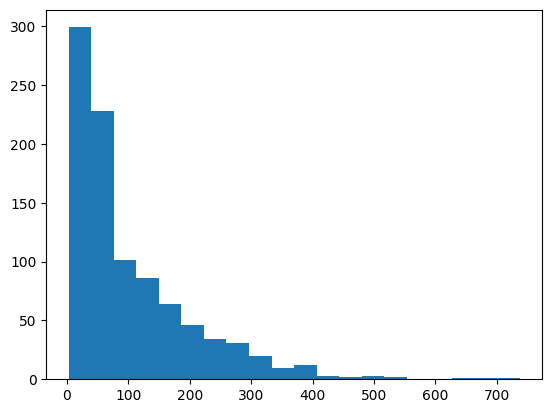

In [16]:
plt.hist(user_rating_count,bins=20)

Text(0.5, 0, 'rating per user')

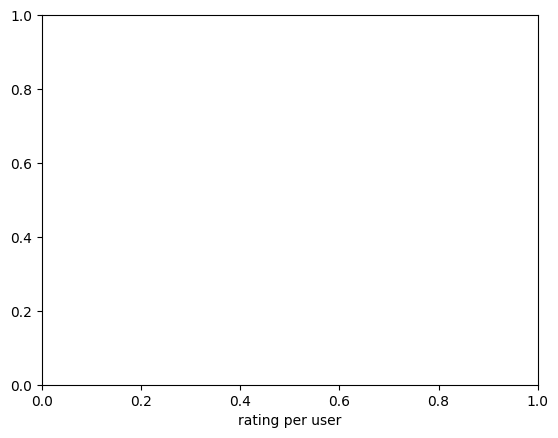

In [17]:
plt.xlabel("rating per user")

Text(0, 0.5, 'Number of Users')

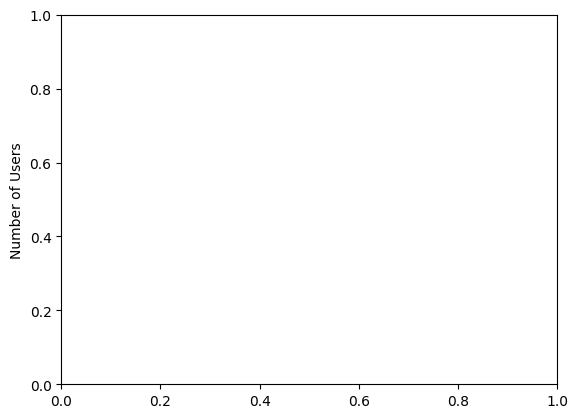

In [19]:
plt.ylabel("Number of Users")

In [22]:

plt.show()


In [29]:
ratings_movies= pd.merge(ratings,movies,on='item_id')





In [30]:
top_movies= ratings_movies.groupby('title')['rating'].count().sort_values(ascending=False).head(10)




In [31]:
plt.figure(figsize=(8,4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Axes: ylabel='title'>

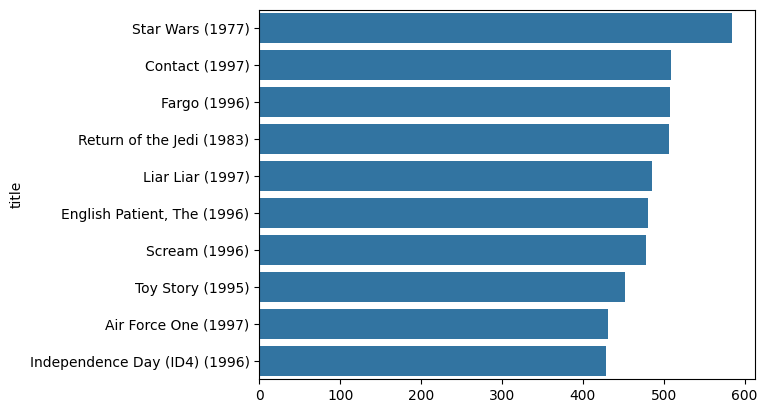

In [32]:
sns.barplot(x=top_movies.values,y=top_movies.index)

Text(0.5, 1.0, 'Top 10 most rated Movies')

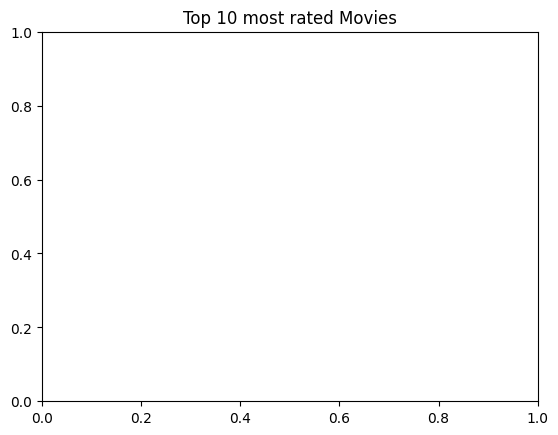

In [33]:
plt.title("Top 10 most rated Movies")

In [34]:
plt.show()

In [36]:
avg_ratings=ratings_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

In [37]:
plt.figure(figsize=(8,4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [40]:
avg_rating = ratings_movies.groupby('title')['rating'].mean().sort_values(ascending=False)


Text(0.5, 1.0, 'top 10 movie by average rating')

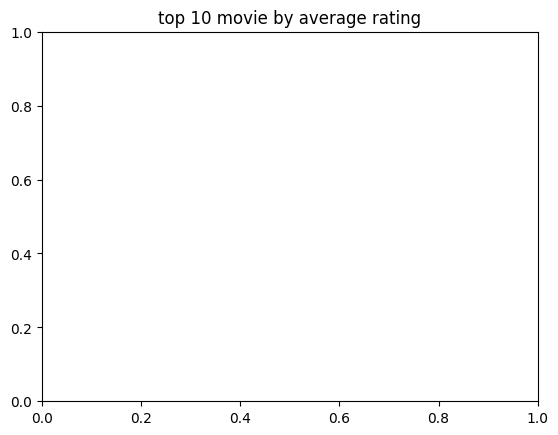

In [41]:
plt.title("top 10 movie by average rating")

In [42]:
plt.show()

In [43]:
user_movie_matrix= ratings_movies.pivot_table(index='user_id',columns='title',values='rating')

In [45]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='title', ylabel='user_id'>

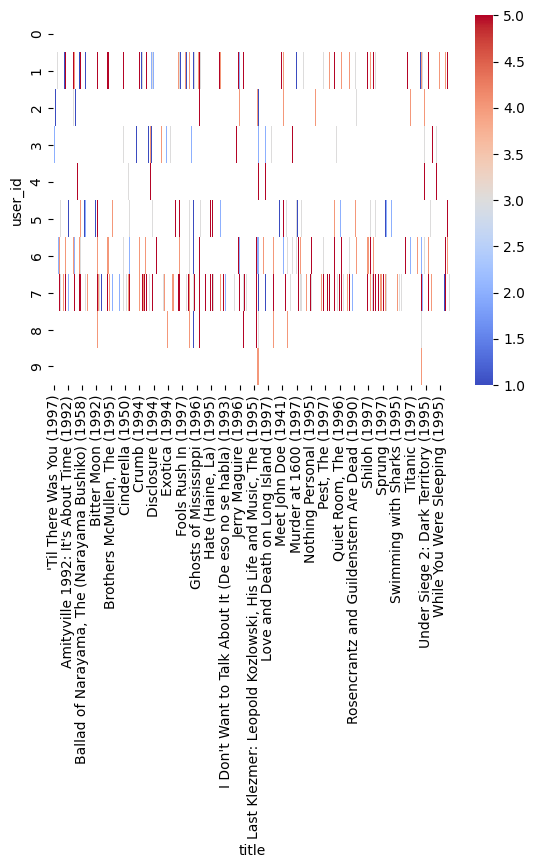

In [46]:
sns.heatmap(user_movie_matrix.head(10),cmap='coolwarm')

Text(0.5, 1.0, 'user -movie rating heatmap')

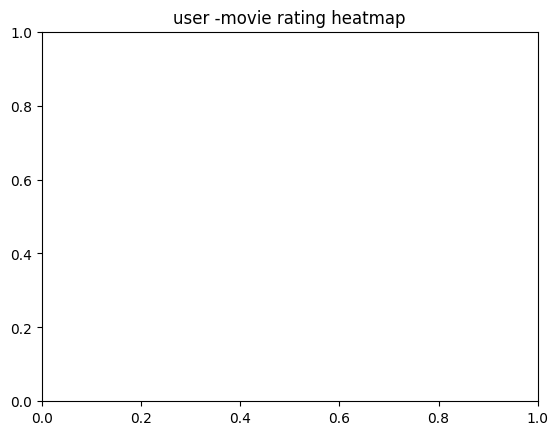

In [47]:
plt.title("user -movie rating heatmap")

In [48]:
plt.show()

In [50]:
movie_per_user = ratings.groupby('user_id')['item_id'].nunique()


In [51]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Axes: ylabel='item_id'>

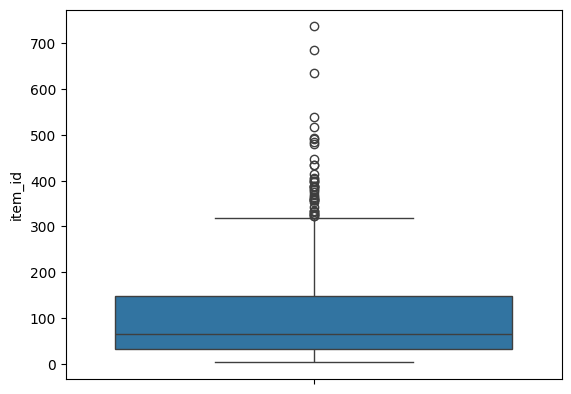

In [52]:
sns.boxplot(movie_per_user)

Text(0.5, 1.0, 'movies watches  per users')

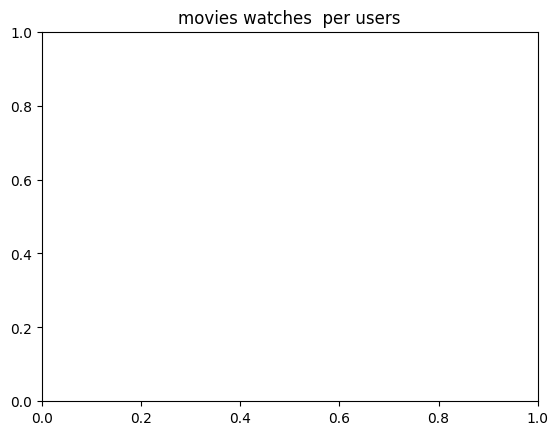

In [53]:
plt.title("movies watches  per users")

In [54]:
plt.show()

In [55]:
ratings.isnull().sum()

,0
user_id,0
item_id,0
rating,0
timestamp,0


In [57]:
ratings.drop_duplicates(inplace=True)

In [59]:
ratings = ratings[(ratings['rating'] >= 1) & (ratings['rating'] <= 5)]


In [61]:
user_movie_matrix.fillna(0,inplace=True)

In [62]:
features= user_movie_matrix

In [64]:
train,text= train_test_split(ratings_movies,test_size=0.2, random_state=42)

In [66]:
user_similarity=cosine_similarity(user_movie_matrix)

In [67]:
user_similarity_df=pd.DataFrame(user_similarity,index=user_movie_matrix.index,columns=user_movie_matrix.index)

In [72]:
def recommend_movies(user_id, n=5):
    pass


In [75]:
user_id = 0




In [76]:
similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]


In [77]:
user_wmovies=user_movie_matrix.loc[user_id]

In [78]:
recommendations=user_movie_matrix.loc[similar_users.index].mean().sort_values(ascending=False)

In [80]:
user_movie_matrix = ratings_movies.pivot_table(
    index='user_id',
    columns='title',
    values='rating'
)


In [85]:
def recommend_movies(user_id, n=5):
    user_movies = user_movie_matrix.loc[user_id]
    recommendations = user_movie_matrix.mean().sort_values(ascending=False)
    recommendations = recommendations[user_movies.isnull()]
    return recommendations.head(n)


In [86]:
recommend_movies(196,5)

,0
title,
"Saint of Fort Washington, The (1993)",5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0
Aiqing wansui (1994),5.0
Star Kid (1997),5.0
